In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
%matplotlib inline

# Camera Calibration to remove lens distortion

In [11]:
#the number of inner square corners in the x and y axes
nx = 9
ny = 6
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

#close any window opened for preview
cv2.destroyAllWindows()

In [12]:
#perform the calibration after getting the obj and img points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [13]:
# Define a function that takes an image, number of x and y points, 
# camera matrix and distortion coefficients
def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    #if ret == True:
    # If we found corners, draw them! (just for fun)
    cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
    # Choose offset from image corners to plot detected corners
    # This should be chosen to present the result at the proper aspect ratio
    # My choice of 100 pixels is not exact, but close enough for our purpose here
    offset = 100 # offset for dst points
    # Grab the image shape
    img_size = (gray.shape[1], gray.shape[0])
    # For source points I'm grabbing the outer four detected corners
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    # For destination points, I'm arbitrarily choosing some points to be
    # a nice fit for displaying our warped result 
    # again, not exact, but close enough for our purposes
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                 [img_size[0]-offset, img_size[1]-offset], 
                                 [offset, img_size[1]-offset]])
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, img_size)
    # Return the resulting image and matrix
    return warped, M

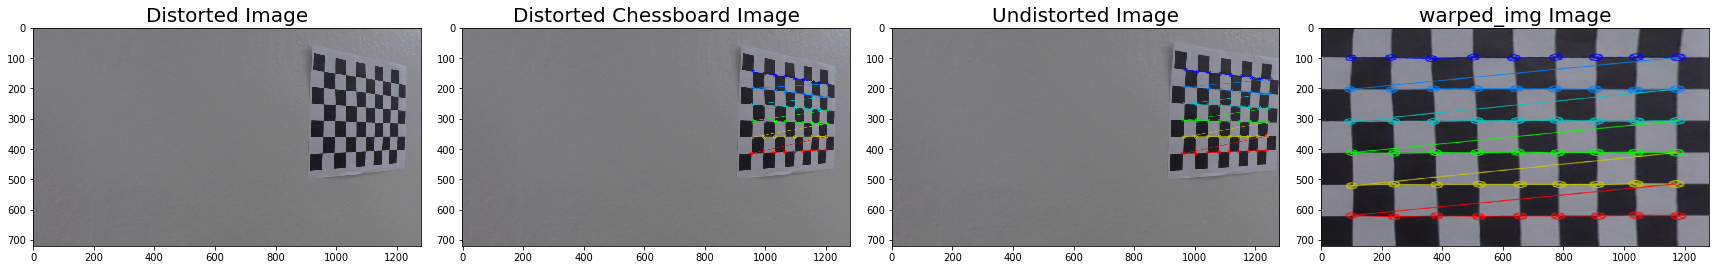

In [14]:
#output an undistorted and transformed image
img = mpimg.imread(images[5])
# Convert undistorted image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Search for corners in the grayscaled image
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
# If we found corners, draw them! (just for fun)
dist_drawn = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
undist = cv2.undistort(img, mtx, dist, None, mtx)
# warped (transformed image)
warped_img, M = corners_unwarp(mpimg.imread(images[5]), nx, ny, mtx, dist )

# save the M data to use without repeating calibration
np.save("M_calibration_data", M)

distorted = mpimg.imread(images[5])

#plot outputs
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 9))
f.tight_layout()
ax1.imshow(distorted)
ax1.set_title('Distorted Image', fontsize=20)
ax2.imshow(dist_drawn)
ax2.set_title('Distorted Chessboard Image', fontsize=20)
ax3.imshow(undist)
ax3.set_title('Undistorted Image', fontsize=20)
ax4.imshow(warped_img)
ax4.set_title('warped_img Image', fontsize=20)

In [15]:
#undistort image function

M = np.load("M_calibration_data.npy")

def undistort_img(img):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


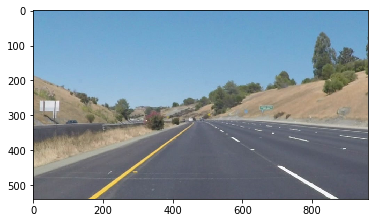

In [16]:
#reading in an image
test_image = mpimg.imread('test_images/solidYellowCurve2.jpg')
test_image2 = mpimg.imread('/media/moe/My_Passport/Udacity/Udacity/sdc/CarND-P4/test_images/test5.jpg')

#printing out some stats and plotting
print('This image is:', type(test_image), 'with dimesions:', test_image.shape)
plt.imshow(test_image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

In [17]:
from ipywidgets import interact, fixed

<function __main__.color_thresh_exp>

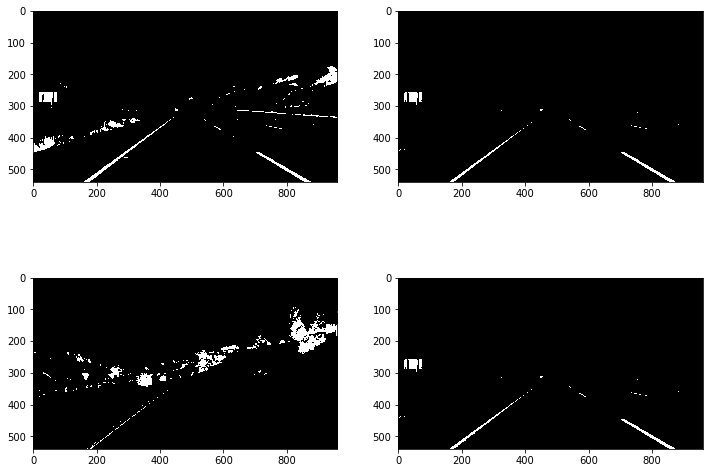

In [18]:
def color_thresh_exp(img, r=190, g=200, b=80):
    
    thresh_img = np.zeros_like(img[:,:,0])
    
    img_r = np.zeros_like(img[:,:,0])
    img_g = np.zeros_like(img[:,:,0])    
    img_b = np.zeros_like(img[:,:,0])
    
    r_thresh = img[:,:,0] > r
    g_thresh = img[:,:,1] > g
    b_thresh = img[:,:,2] < b
    
    img_r[r_thresh] = 1    
    img_g[g_thresh] = 1    
    img_b[b_thresh] = 1
    
    thresh_img[(r_thresh & g_thresh) | (b_thresh & r_thresh)] = 1 
    
    fig = plt.figure(figsize=(12,9))
    plt.subplot(221)
    plt.imshow(img_r, cmap='gray')
    plt.subplot(222)
    plt.imshow(img_g, cmap='gray')
    plt.subplot(223)
    plt.imshow(img_b, cmap='gray')
    plt.subplot(224)
    plt.imshow(thresh_img, cmap='gray')
#     return thresh_img

interact(color_thresh_exp,img=fixed(test_image), r=(0,255,10), g=(0,255,10), b=(0,255,10))
                                                

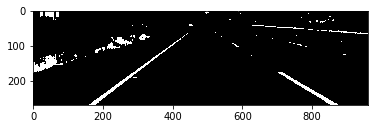

In [19]:
def color_thresh(img, r=190, g=150, b=110):
    
    horizon = int((img.shape[0]/2))
    
    thresh_img = np.zeros_like(img[horizon:,:,0])
    
    r_thresh = img[horizon:,:,0] > r
    g_thresh = img[horizon:,:,1] > g
    b_thresh = img[horizon:,:,2] < b
    
    thresh_img[(r_thresh & g_thresh) | (b_thresh & r_thresh)] = 255
    
    return thresh_img

plt.imshow(color_thresh(test_image), cmap='gray')
plt.imsave("grayed_crop", color_thresh(test_image))

<function __main__.persp_warp_test>

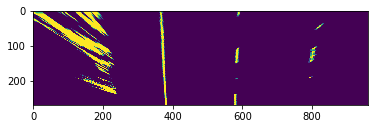

In [20]:
def persp_warp_test(img, 
                src1x=167,
                src2x=863,
                src3x=547,
                src4x=428,
                src1y=268,
                src2y=268,
                src3y=82,
                src4y=82,
                dst1x=380,
                dst2x=580,
                dst3x=580,
                dst4x=380,
                dst1y=270,
                dst2y=270,
                dst3y=50,
                dst4y=50,
              ):
    
#     shape[0] y axis
#     shape[1] x axis0
#     (270, 960, 3)

    
    #get the input image size (since this may vary between runs)
    img_size = (img.shape[1], img.shape[0])

    #obtain and set the source points based on the given ratios
    src = np.float32([[img.shape[1]*(src1x/960),img.shape[0]*(src1y/270)],
                      [img.shape[1]*(src2x/960),img.shape[0]*(src2y/270)],
                      [img.shape[1]*(src3x/960),img.shape[0]*(src3y/270)],
                      [img.shape[1]*(src4x/960),img.shape[0]*(src4y/270)]])
    
    #obtain and set the destination points based on the given ratios
    dst = np.float32([[img.shape[1]*(dst1x/960),img.shape[0]*(dst1y/270)],
                      [img.shape[1]*(dst2x/960),img.shape[0]*(dst2y/270)],
                      [img.shape[1]*(dst3x/960),img.shape[0]*(dst3y/270)],
                      [img.shape[1]*(dst4x/960),img.shape[0]*(dst4y/270)]])
    
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    dsize = (img.shape[1], img.shape[0])
    
    warped = cv2.warpPerspective(img, M, dsize, flags=cv2.INTER_LINEAR)
    
    plt.imshow(warped)
    


interact(persp_warp_test, img=fixed(color_thresh(test_image)),
                src1x=(-2000,2000,1),
                src2x=(-2000,2000,1),
                src3x=(-2000,2000,1),
                src4x=(-2000,2000,1),
                src1y=(-2000,2000,1),
                src2y=(-2000,2000,1),
                src3y=(-2000,2000,1),
                src4y=(-2000,2000,1),
                dst1x=(-2000,2000,1),
                dst2x=(-2000,2000,1),
                dst3x=(-2000,2000,1),
                dst4x=(-2000,2000,1),
                dst1y=(-2000,2000,1),
                dst2y=(-2000,2000,1),
                dst3y=(-2000,2000,1),
                dst4y=(-2000,2000,1)
         )

# 167
# 863
# 547
# 428
# 268
# 268
# 82
# 82
# 0
# 1280
# 1280
# 0
# 720
# 720
# 0
# 0


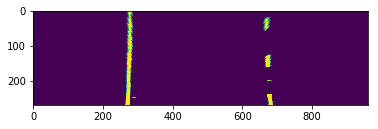

In [21]:
def persp_warp(img, 
                src1x=167,
                src2x=863,
                src3x=535,
                src4x=435,
                src1y=270,
                src2y=270,
                src3y=70,
                src4y=70,
                dst1x=280,
                dst2x=680,
                dst3x=680,
                dst4x=280,
                dst1y=270,
                dst2y=270,
                dst3y=0,
                dst4y=0,
              ):


    #obtain and set the source points based on the given ratios
    src = np.float32([[img.shape[1]*(src1x/960),img.shape[0]*(src1y/270)],
                      [img.shape[1]*(src2x/960),img.shape[0]*(src2y/270)],
                      [img.shape[1]*(src3x/960),img.shape[0]*(src3y/270)],
                      [img.shape[1]*(src4x/960),img.shape[0]*(src4y/270)]])
    
    #obtain and set the destination points based on the given ratios
    dst = np.float32([[img.shape[1]*(dst1x/960),img.shape[0]*(dst1y/270)],
                      [img.shape[1]*(dst2x/960),img.shape[0]*(dst2y/270)],
                      [img.shape[1]*(dst3x/960),img.shape[0]*(dst3y/270)],
                      [img.shape[1]*(dst4x/960),img.shape[0]*(dst4y/270)]])
    
    
    M = cv2.getPerspectiveTransform(src, dst)
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    dsize = (img.shape[1], img.shape[0])
    
    warped = cv2.warpPerspective(img, M, dsize, flags=cv2.INTER_LINEAR)
    
    return warped, Minv


warped, Minv = persp_warp(color_thresh(undistort_img(test_image)))

plt.imshow(warped)

In [94]:

all_map = np.zeros_like(warped)
map_count = 0

img_h, img_w = warped.shape

def mapping(img, init_=False):
    
    global all_map
    global img_h
    global img_w
    global map_count
    
    if(init_):
        all_map = np.zeros_like(img)
        img_h, img_w = img.shape
        map_count = 0
    
    if(map_count > 0):
        
        detection_range = 10 # meters
        speed = 2 # meters per frame

        h_increase = np.int(speed/detection_range * img_h)

        map_zeros = np.zeros_like(all_map)
        
        cur_h = map_zeros.shape[0]
        
        zeros_resize = cv2.resize(map_zeros,(img_w,cur_h + h_increase))
        
#         print(zeros_resize.shape)
        resize_h = cur_h + h_increase
        
        zeros_resize[resize_h-cur_h:,:] = all_map
        
        zeros_resize[:img_h,:] = img
        
        all_map = zeros_resize
    
    else:
        
        all_map = img
        
    map_count +=1
    




(594, 960)


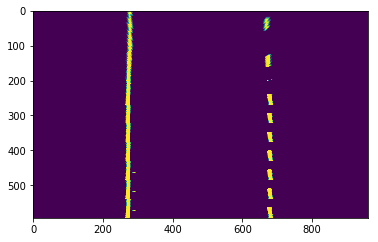

In [72]:
mapping(warped)
plt.imshow(all_map)

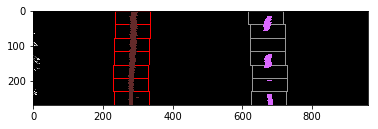

In [76]:
def lane_search(img, draw_boxes=True):
    
#     # show the input image *******
#     fig = plt.figure(figsize=(12,9))
#     plt.subplot(221)
#     plt.imshow(img, cmap="gray")
    
    out_img = np.dstack((img, img, img))*255
#     out_img = np.copy(img)
    
    # Take a histogram of the bottom half of the image
    binary_img = np.copy(img)
    botx_histogram = np.sum(binary_img[int(binary_img.shape[0]/2):,:], axis=0)
    topx_histogram = np.sum(binary_img[:int(binary_img.shape[0]/2),:], axis=0)
    midx_histogram = np.sum(binary_img[int(binary_img.shape[0]/4):int(binary_img.shape[0]*3/4),:], axis=0)
    
#     # show the histogram detected ********
#     plt.subplot(222)
#     plt.plot(botx_histogram)
#     plt.plot(topx_histogram)
#     plt.plot(midx_histogram)
    
    # find the right and left lane bases
    lane_midpoint = np.int(botx_histogram.shape[0]/2)
    left_xbase = np.argmax(botx_histogram[:lane_midpoint])
    right_xbase = np.argmax(botx_histogram[lane_midpoint:]) + lane_midpoint
    
#     print("hist: ", botx_histogram.shape, "midpoint: ", lane_midpoint,
#           "left: ", left_xbase, "right: ",  right_xbase)
    
#     cv2.rectangle(out_img,(left_xbase-10,out_img.shape[0]),(left_xbase+10,out_img.shape[0]-20),(255,0,0), 2)
    
    nwindows = 7
    
    win_h = np.int(binary_img.shape[0]/nwindows)
    
    margin = 50
    
    nonzero = binary_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    left_xcurr= left_xbase
    right_xcurr = right_xbase
    
    minpix = 50
    
    left_lane_inds = []
    right_lane_inds = []
    
    for window in range(nwindows):
        
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_img.shape[0] - (window+1)*win_h
        win_y_high = binary_img.shape[0] - (window)*win_h
        win_xleft_low = left_xcurr - margin
        win_xleft_high = left_xcurr + margin
        win_xright_low = right_xcurr - margin
        win_xright_high = right_xcurr + margin
        
        # Draw the windows on the visualization image
        if draw_boxes == True:
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(255,0,0), 2) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(150,150,150), 2) 
            
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
#         print("len of gd indeces:", len(good_left_inds), len(good_right_inds))
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            left_xcurr = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            right_xcurr = np.int(np.mean(nonzerox[good_right_inds]))
    
    
#     Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    
    # Fit a second order polynomial to each
#     if len(lefty) != 0:
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_img.shape[0]-1, binary_img.shape[0])
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [99, 42, 42]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [219, 104, 255]

#     implot = plt.imshow(out_img)
#     plt.plot(left_fitx, ploty)
#     plt.plot(right_fitx, ploty)#     plt.subplot(223)
#     plt.imshow(out_img)
#     plt.show()
    
    
    return out_img, left_fitx, right_fitx, ploty, left_fit, right_fit
    
    
out_img, left_fitx, right_fitx, ploty, left_fit, right_fit = lane_search(persp_warp(color_thresh(test_image))[0])
    
    
plt.imshow(out_img)

In [77]:
def real_curv(out_img, left_fitx, right_fitx, ploty, left_fit, right_fit):
    # Define y-value where we want radius of curvature
    # I'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
#     print(left_curverad, right_curverad)
    # Example values: 1926.74 1908.48

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
#     print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    
    return left_curverad, right_curverad

real_curv(out_img, left_fitx, right_fitx, ploty, left_fit, right_fit)

(20638.72035047926, 692.28110197035949)

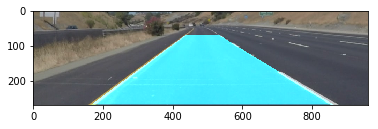

In [78]:
def draw_curv(img, warped, left_fitx, right_fitx, ploty, Minv):
    
    x,y = warped.shape
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp[::,:], np.int_([pts[:,:,:]]), (0, 203, 255))
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (warped.shape[1], warped.shape[0])) 
    # Combine the result with the original image\
    result = cv2.addWeighted(img[img.shape[0]-x:,img.shape[1]-y:,:], 0.8, newwarp, 0.8, 0)
    
    return result

result = draw_curv(test_image, warped, left_fitx, right_fitx, ploty, Minv)
plt.imshow(result)

In [79]:
#layer together two input images
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

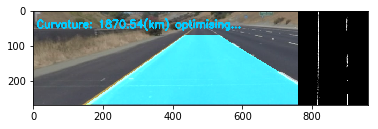

In [101]:
runs = 0

def pipeline(image):
        
    global runs
        
    undist_img = undistort_img(image)
    
    color_threshed_img = color_thresh(undist_img)
    
    persp_warped_img, Minv = persp_warp(color_threshed_img)
    
    if(runs > 0):
        
        mapping(persp_warped_img)
    else:
        
        mapping(persp_warped_img, True)
        runs += 1
    
    lane_serach_img, left_fitx, right_fitx, ploty, left_fit, right_fit = lane_search(persp_warped_img)
    
    weighted_output_img = draw_curv(undist_img, persp_warped_img, left_fitx, right_fitx, ploty, Minv)
    
    real_curv_val = real_curv(weighted_output_img, left_fitx, right_fitx, ploty, left_fit, right_fit)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    img_text = cv2.putText(weighted_output_img,("Curvature: " + str("{0:.2f}".format(real_curv_val[0])) + "(km) optimising..."),(10,50), font, 1,(0, 203, 255),4,cv2.LINE_AA)
    
    
    # lane experiment
    
      
    lane_view = cv2.resize(all_map, (200,weighted_output_img.shape[0]))
    
    lane_img = np.dstack((lane_view, lane_view, lane_view))
    
    weighted_output_img[:,weighted_output_img.shape[1]-200:,:] = lane_img
    
    return weighted_output_img

plt.imshow(pipeline(test_image))

# Video Output

In [102]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [103]:
runs = 0

white_output = 'RT.mp4'
clip1 = VideoFileClip("solidYellowLeft.mp4")
white_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video RT.mp4
[MoviePy] Writing video RT.mp4


100%|█████████▉| 681/682 [00:47<00:00,  8.59it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: RT.mp4 

CPU times: user 1min 38s, sys: 1.88 s, total: 1min 40s
Wall time: 47.6 s


In [104]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

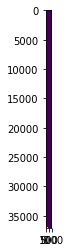

In [93]:
plt.imshow(all_map)
plt.imsave("map", cv2.resize(all_map, (300,5000)))

## Challenge

In [105]:
runs = 0

black_output = 'RT_challenge.mp4'
clip1 = VideoFileClip("challenge.mp4")
white_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(black_output, audio=False)

[MoviePy] >>>> Building video RT_challenge.mp4
[MoviePy] Writing video RT_challenge.mp4


100%|██████████| 251/251 [00:26<00:00,  7.85it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: RT_challenge.mp4 

CPU times: user 42.4 s, sys: 536 ms, total: 42.9 s
Wall time: 27.2 s


In [106]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(black_output))